# FantaBayesianNet

In [1]:
import sys
!{sys.executable} -m pip install pgmpy
!{sys.executable} -m pip install --upgrade pip

     |████████████████████████████████| 327kB 3.3MB/s 
     |████████████████████████████████| 1.5MB 5.2MB/s 
  Found existing installation: pip 19.3.1
    Uninstalling pip-19.3.1:
      Successfully uninstalled pip-19.3.1


## 1. Define the model
The first step consists in building the structure of our model, that is to define the relations between the involved variables.
In the following lines we define the network model using pgmpy library and I display the resulting graph using networkx.

In [4]:
from pgmpy.models import BayesianModel

model = BayesianModel([('Red_card', 'Grade'),
                       ('Yellow_card', 'Grade'),
                       ('Goal', 'Grade'),
                       ('Assist', 'Grade'),
                       ('Unavailable', 'Minutes'),
                       ('Difficulty_match', 'Deployability'),
                       ('Grade', 'Deployability'),
                       ('Minutes', 'Deployability')
                       ])

#Network nodes and out-edges
nodes = list(model.nodes())
edges = list(model.edges())
print("Nodes:", nodes)
print("\nOutEdges:", edges)

Nodes: ['Red_card', 'Grade', 'Yellow_card', 'Goal', 'Assist', 'Unavailable', 'Minutes', 'Difficulty_match', 'Deployability']

OutEdges: [('Red_card', 'Grade'), ('Grade', 'Deployability'), ('Yellow_card', 'Grade'), ('Goal', 'Grade'), ('Assist', 'Grade'), ('Unavailable', 'Minutes'), ('Minutes', 'Deployability'), ('Difficulty_match', 'Deployability')]


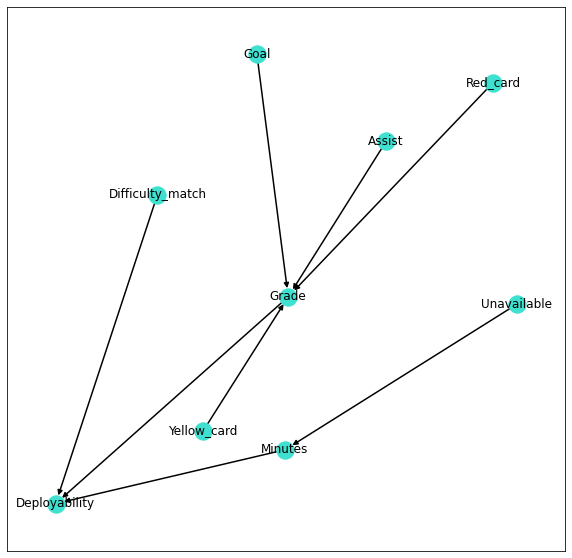

In [5]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
%matplotlib inline
np.random.seed(8)

DAG = nx.DiGraph()
DAG.add_edges_from(edges)

fig = plt.figure(figsize = (10,10))
pos = nx.spring_layout(DAG) #Position nodes computed by using Fruchterman-Reingold force-directed algorithm.
nx.draw_networkx_nodes(DAG, pos=pos, node_color='turquoise')
nx.draw_networkx_labels(DAG, pos=pos)
nx.draw_networkx_edges(DAG, pos=pos, edge_color='black', width = 1.5, arrows=True)
plt.show()